In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('Resources/train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([6, 5, 9, ..., 3, 3, 3], dtype=int64)

In [4]:
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2

# def ReLU(Z):
#     return np.maximum(Z, 0)

# def softmax(Z):
#     A = np.exp(Z) / sum(np.exp(Z))
#     return A
    
# def forward_prop(W1, b1, W2, b2, X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

# def ReLU_deriv(Z):
#     return Z > 0

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

# def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
#     one_hot_Y = one_hot(Y)
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1 / m * dZ2.dot(A1.T)
#     db2 = 1 / m * np.sum(dZ2)
#     dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
#     dW1 = 1 / m * dZ1.dot(X.T)
#     db1 = 1 / m * np.sum(dZ1)
#     return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1 - alpha * dW1
#     b1 = b1 - alpha * db1    
#     W2 = W2 - alpha * dW2  
#     b2 = b2 - alpha * db2    
#     return W1, b1, W2, b2

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [6]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [7]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.010, 10000)

Iteration:  0
[6 6 0 ... 0 0 2] [6 5 9 ... 3 3 3]
0.12592682926829268
Iteration:  10
[6 6 8 ... 0 0 2] [6 5 9 ... 3 3 3]
0.12658536585365854
Iteration:  20
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.12653658536585366
Iteration:  30
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.12760975609756098
Iteration:  40
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.12863414634146342
Iteration:  50
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.13109756097560976
Iteration:  60
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.13697560975609757
Iteration:  70
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.1460731707317073
Iteration:  80
[6 6 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.15760975609756098
Iteration:  90
[6 9 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.16751219512195123
Iteration:  100
[6 9 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.17592682926829267
Iteration:  110
[6 9 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.18314634146341463
Iteration:  120
[6 9 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.19039024390243903
Iteration:  130
[6 9 8 ... 0 9 6] [6 5 9 ... 3 3 3]
0.19497560975609757
Iter

In [8]:
# Added additional layer, nearly same results on last iteration of roughly 0.8355609756097561 accuracy
# will test 'xavier' technique

In [9]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [6]
Label:  6


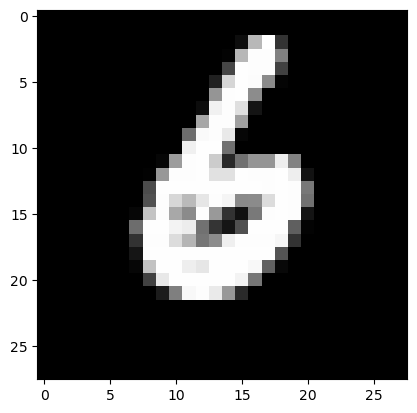

Prediction:  [5]
Label:  5


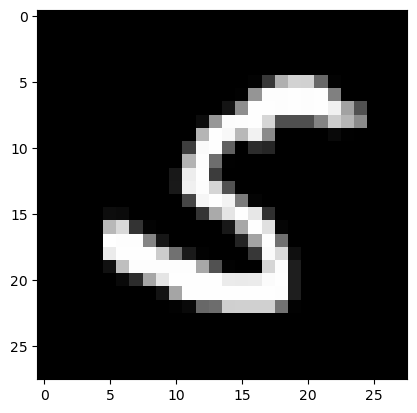

Prediction:  [7]
Label:  9


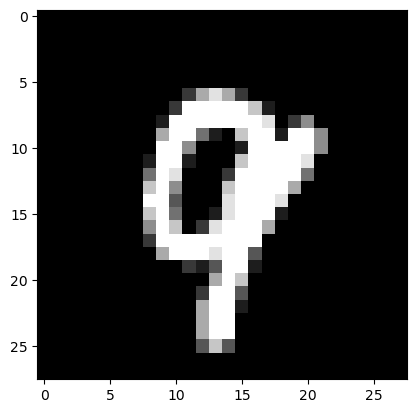

Prediction:  [8]
Label:  8


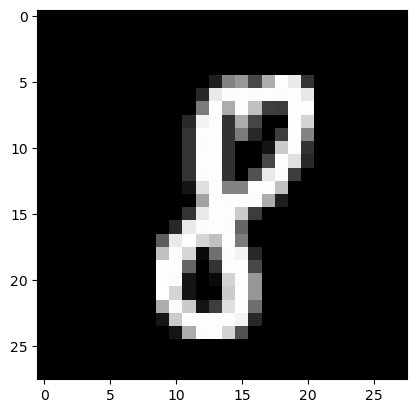

In [10]:
# Call test_prediction with the updated parameters
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [11]:
# Make predictions on the development set with the updated model
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
print(get_accuracy(dev_predictions, Y_dev))


[3 6 2 1 9 4 2 0 0 9 5 9 2 5 1 9 0 6 7 2 9 9 8 6 2 0 1 1 0 1 9 0 2 8 0 1 8
 3 5 4 9 7 2 9 8 1 1 5 1 4 9 0 9 3 1 8 9 8 4 2 1 3 4 5 8 7 5 4 6 0 4 3 1 3
 6 5 5 5 5 5 5 6 7 4 2 7 2 1 8 0 8 4 1 1 0 9 6 7 0 5 9 1 0 5 5 9 5 8 1 4 5
 4 9 7 6 9 9 1 7 0 3 2 3 1 9 6 3 1 5 9 0 3 8 5 6 5 7 5 1 3 2 4 3 2 8 2 6 5
 1 2 0 9 7 0 7 5 2 5 3 5 0 2 6 4 1 3 6 3 2 3 4 8 6 2 3 0 8 7 1 5 8 2 4 2 6
 4 4 3 6 3 0 8 4 9 8 8 6 0 3 6 0 0 3 3 3 1 7 0 1 0 9 8 4 2 4 3 1 1 4 4 3 3
 6 1 9 9 1 5 9 3 1 4 4 2 0 7 5 8 4 5 8 6 4 8 7 6 8 8 9 8 1 2 9 4 6 7 0 6 3
 1 5 3 1 9 4 8 9 9 3 5 1 2 8 2 7 0 4 1 5 1 1 9 8 5 1 1 8 9 0 3 9 0 4 0 9 4
 5 0 2 7 9 3 6 8 5 1 0 4 7 5 0 2 6 7 2 0 8 4 1 6 4 5 7 5 5 7 2 1 9 4 6 9 5
 4 9 9 9 1 6 1 1 7 6 4 1 5 7 5 1 1 7 9 7 9 1 4 2 9 9 0 7 9 7 7 9 0 0 1 9 2
 0 3 5 9 7 7 6 9 1 7 7 4 1 0 1 4 3 2 0 1 1 5 8 0 8 6 4 4 1 3 5 1 8 4 0 3 2
 1 9 4 7 4 4 7 9 3 6 6 2 5 9 8 3 0 5 4 0 0 1 6 5 8 8 1 4 8 1 7 2 1 1 1 0 3
 9 2 1 8 1 4 4 2 6 5 0 6 0 2 3 5 9 2 1 2 5 0 7 1 0 2 8 7 3 2 4 3 6 5 0 1 2
 7 1 0 7 8 3 9 0 3 5 4 0 